In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("Salary_Dataset_with_Extra_Features.csv")
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [7]:
df.count()

Rating               22770
Company Name         22770
Job Title            22770
Salary               22770
Salaries Reported    22770
Location             22770
Employment Status    22770
Job Roles            22770
dtype: int64

In [221]:
len(df['Salary'].unique())

316

In [31]:
df.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [32]:
a=df.isna().sum()
a

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [33]:
df.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles'],
      dtype='object')

In [8]:
features=['Rating','Job Title','Salaries Reported','Location', 'Employment Status', 'Job Roles']
features

['Rating',
 'Job Title',
 'Salaries Reported',
 'Location',
 'Employment Status',
 'Job Roles']

# plot box plot

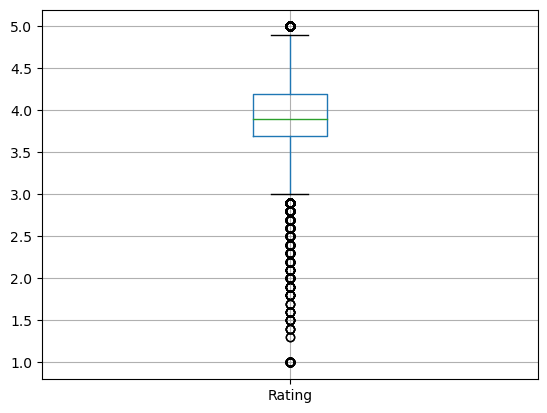

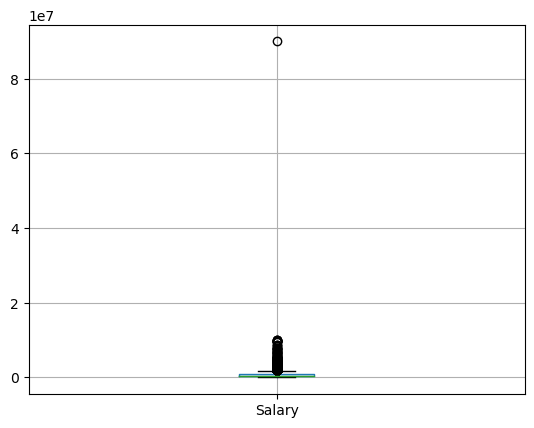

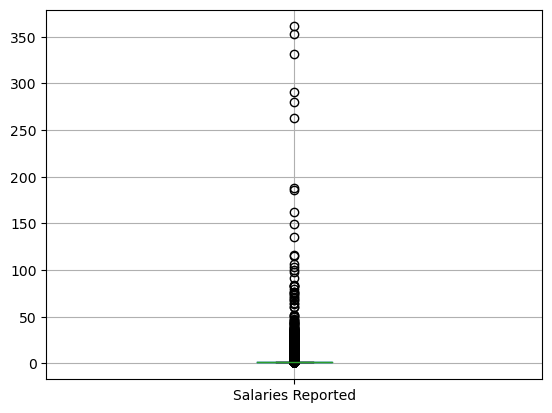

In [87]:
for i in ['Rating','Salary','Salaries Reported']:
    df.boxplot(column=i)
    plt.show()

# To find out outliers

In [9]:
def IQR_values(df,column_name):
    q1=df[column_name].quantile(0.25) #to set quantille of columns
    q2=df[column_name].quantile(0.50)
    q3=df[column_name].quantile(0.75)
    IQR=q3-q1 #to find IQR value
    low_limit=q1-1.5*IQR #setting low limit and upper limit
    upper_limit=q3+1.5*IQR
    return low_limit,upper_limit

outlier={}
for column in ['Rating','Salary','Salaries Reported']:
    low_limit,upper_limit=IQR_values(df,column)
    outlier[column]=[low_limit,upper_limit]
outlier

{'Rating': [2.95, 4.95],
 'Salary': [-600000.0, 1800000.0],
 'Salaries Reported': [1.0, 1.0]}

# Replace outlier with mean

In [11]:
outindx=[]
for i in ['Rating','Salary','Salaries Reported']:
    df_outl=(df[i]>outlier[i][1])|(df[i]<outlier[i][0])
    x=df.loc[df_outl].index
    outindx.append(x)
outindx

[Int64Index([   30,    35,    37,    42,    43,    53,    63,    73,    84,
                85,
             ...
             22695, 22702, 22704, 22710, 22732, 22735, 22738, 22742, 22759,
             22764],
            dtype='int64', length=1548),
 Int64Index([   96,   106,   145,   161,   162,   196,   211,   250,   258,
               277,
             ...
             21697, 21908, 22031, 22207, 22225, 22241, 22271, 22274, 22366,
             22675],
            dtype='int64', length=1156),
 Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             21889, 21890, 21891, 21892, 21893, 21894, 21895, 22767, 22768,
             22769],
            dtype='int64', length=4564)]

In [13]:
a=['Rating','Salaries Reported']
for i in range(len(a)):
    df.loc[outindx[i],a[i]]=df[a[i]].mean()
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3.0,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3.0,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3.0,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3.0,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3.0,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1.0,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1.0,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13.0,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7.0,Bangalore,Full Time,Web


In [14]:
a=['Rating','Salary','Salaries Reported']
for i in range(len(a)):
    df.loc[outindx[i],a[i]]=df[a[i]].mean()
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000.0,1.837929,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000.0,1.837929,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000.0,1.837929,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000.0,1.837929,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000.0,1.837929,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000.0,1.000000,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000.0,1.000000,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000.0,1.837929,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000.0,1.837929,Bangalore,Full Time,Web


# Label encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()

In [16]:
le = ['Job Title','Location', 'Employment Status', 'Job Roles']
le

['Job Title', 'Location', 'Employment Status', 'Job Roles']

In [17]:
df[le] = df[le].apply(lenc.fit_transform)
df[le]

,Job Title,Location,Employment Status,Job Roles
0,28,0,1,0
1,28,0,1,0
2,28,0,1,0
3,28,0,1,0
4,28,0,1,0
...,...,...,...,...
22765,1071,0,1,10
22766,1071,0,1,10
22767,264,0,1,10
22768,264,0,1,10


In [100]:
c=df['Job Roles'].unique()
len(c)

11

In [18]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,28,400000.0,1.837929,0,1,0
1,4.5,Advanced Millennium Technologies,28,400000.0,1.837929,0,1,0
2,4.0,Unacademy,28,1000000.0,1.837929,0,1,0
3,3.8,SnapBizz Cloudtech,28,300000.0,1.837929,0,1,0
4,4.4,Appoids Tech Solutions,28,600000.0,1.837929,0,1,0
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,1071,200000.0,1.000000,0,1,10
22766,4.0,Nextgen Innovation Labs,1071,300000.0,1.000000,0,1,10
22767,4.1,Fresher,264,192000.0,1.837929,0,1,10
22768,4.1,Accenture,264,300000.0,1.837929,0,1,10


In [78]:
df.corr()

,Rating,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
Rating,1.000000,-0.019593,0.020009,-0.024089,0.009852,0.049227,-0.020045
Job Title,-0.019593,1.000000,0.078433,0.086945,-0.107749,0.007075,0.843717
Salary,0.020009,0.078433,1.000000,-0.009025,-0.005945,-0.101473,0.032260
Salaries Reported,-0.024089,0.086945,-0.009025,1.000000,-0.047771,-0.010258,0.091863
Location,0.009852,-0.107749,-0.005945,-0.047771,1.000000,0.056476,-0.089645
Employment Status,0.049227,0.007075,-0.101473,-0.010258,0.056476,1.000000,0.023712
Job Roles,-0.020045,0.843717,0.032260,0.091863,-0.089645,0.023712,1.000000


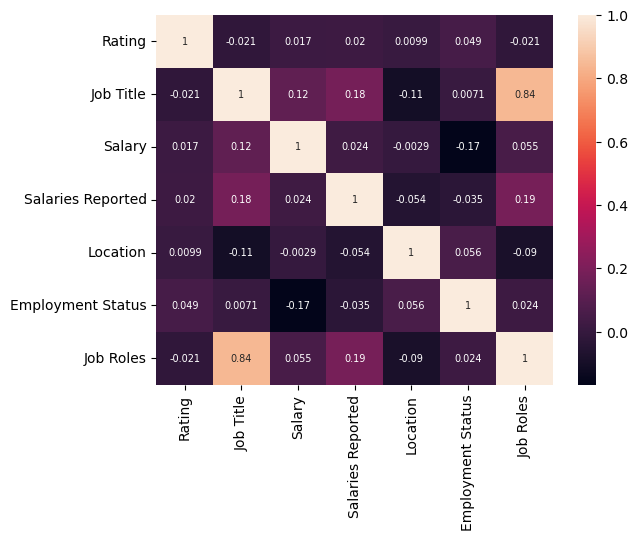

In [19]:
sns.heatmap(df.corr(),cmap="rocket",annot=True,annot_kws={'size':7})
plt.show()

# Modelling

In [40]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x=df.drop(['Salary','Company Name'],axis=1)
y=df['Salary']

In [43]:
x

,Rating,Job Title,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,28,1.837929,0,1,0
1,4.5,28,1.837929,0,1,0
2,4.0,28,1.837929,0,1,0
3,3.8,28,1.837929,0,1,0
4,4.4,28,1.837929,0,1,0
...,...,...,...,...,...,...
22765,4.7,1071,1.000000,0,1,10
22766,4.0,1071,1.000000,0,1,10
22767,4.1,264,1.837929,0,1,10
22768,4.1,264,1.837929,0,1,10


In [44]:
y

0         400000.0
1         400000.0
2        1000000.0
3         300000.0
4         600000.0
           ...    
22765     200000.0
22766     300000.0
22767     192000.0
22768     300000.0
22769     300000.0
Name: Salary, Length: 22770, dtype: float64

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [46]:
x_test.shape

(4554, 6)

In [47]:
lr.fit(x_train,y_train) #training the model using linear regression

LinearRegression()

In [48]:
y_pred=lr.predict(x_test)
y_pred

array([626432.67407983, 634557.56042476, 541156.13043333, ...,
       633184.06210339, 560072.46786339, 562302.62842311])

In [49]:
x.iloc[0]

Rating                3.800000
Job Title            28.000000
Salaries Reported     1.837929
Location              0.000000
Employment Status     1.000000
Job Roles             0.000000
Name: 0, dtype: float64

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mean_squared_error(y_test,y_pred)

144890300323.17673

# SVR

In [52]:
from sklearn.svm import SVR
svm_linear=SVR(kernel='linear')

In [53]:
svm_linear.fit(x_train,y_train,sample_weight=None)

SVR(kernel='linear')

In [54]:
svm_linear_pred=svm_linear.predict(x_test)
svm_linear_pred

array([555832.57071545, 556266.42113547, 452656.95331667, ...,
       556263.29502109, 420333.94768592, 423869.56647359])

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
mean_squared_error(y_test,svm_linear_pred)

158897271167.90262

# Decision Tree

In [67]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion="squared_error")

In [68]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [69]:
dtr_pred=dtr.predict(x_test)
dtr_pred

array([797176.47058824, 816176.47058824, 442666.66666667, ...,
       690000.        , 412000.        , 260000.        ])

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
mean_squared_error(y_test,dtr_pred)

164220468296.8356